### Exploratory Data Analysis on Boston Data Housing Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
#from sklearn.linear_model import LinearRegression
#from sklearn.datasets import make_blobs
from sklearn.model_selection import ShuffleSplit
from scipy import stats

import warnings

warnings.filterwarnings('ignore')



In [2]:
# Pretty display for notebooks
%matplotlib inline

In [3]:
#Columns in csv data file

# OBS.     Index Value
# TOWN     Town Name 
# TOWN#    Town Number 
# TRACT    ??????? 
# LON      Longitude
# LAT      Latitude

# MEDV - Median value of owner-occupied homes in $10000's
# CMEDV - ?????

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - percentage of lower status of the population


In [5]:
file = 'Resources/bost_housing_augmented.csv'
boston_data = pd.read_csv(file)
boston_data.head()

OBS.        TOWN  TOWN#  TRACT     LON      LAT  MEDV  CMEDV     CRIM  \
0     1      Nahant      0   2011 -70.955  42.2550  24.0   24.0  0.00632   
1     2  Swampscott      1   2021 -70.950  42.2875  21.6   21.6  0.02731   
2     3  Swampscott      1   2022 -70.936  42.2830  34.7   34.7  0.02729   
3     4  Marblehead      2   2031 -70.928  42.2930  33.4   33.4  0.03237   
4     5  Marblehead      2   2032 -70.922  42.2980  36.2   36.2  0.06905   

     ZN  ...  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  \
0  18.0  ...     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1   0.0  ...     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2   0.0  ...     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3   0.0  ...     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4   0.0  ...     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  

[5 rows x 21 columns]

In [6]:
#High Level Understanding of data
boston_data.shape

(506, 21)

In [7]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS.     506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWN#    506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

In [9]:
#Check for Null Values
boston_data.isnull().sum()

OBS.       0
TOWN       0
TOWN#      0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

<AxesSubplot:>

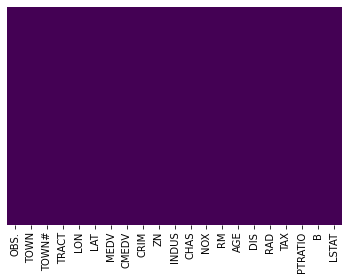

In [10]:
#Visually Check for Null Values
sn.heatmap(boston_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [11]:
#Describe basic statistics for numerical datafields
boston_data.describe().T

count         mean          std        min          25%         50%  \
OBS.     506.0   253.500000   146.213884    1.00000   127.250000   253.50000   
TOWN#    506.0    47.531621    27.571401    0.00000    26.250000    42.00000   
TRACT    506.0  2700.355731  1380.036830    1.00000  1303.250000  3393.50000   
LON      506.0   -71.056389     0.075405  -71.28950   -71.093225   -71.05290   
LAT      506.0    42.216440     0.061777   42.03000    42.180775    42.21810   
MEDV     506.0    22.532806     9.197104    5.00000    17.025000    21.20000   
CMEDV    506.0    22.528854     9.182176    5.00000    17.025000    21.20000   
CRIM     506.0     3.613524     8.601545    0.00632     0.082045     0.25651   
ZN       506.0    11.363636    23.322453    0.00000     0.000000     0.00000   
INDUS    506.0    11.136779     6.860353    0.46000     5.190000     9.69000   
CHAS     506.0     0.069170     0.253994    0.00000     0.000000     0.00000   
NOX      506.0     0.554695     0.115878    0.38500     0.449000     0.53800   
RM       506.0     6.284634     0.702617    3.56100     5.885500     6.20850   
AGE      506.0    68.574901    28.148861    2.90000    45.025000    77.50000   
DIS      506.0     3.795043     2.105710    1.12960     2.100175     3.20745   
RAD      506.0     9.549407     8.707259    1.00000     4.000000     5.00000   
TAX      506.0   408.237154   168.537116  187.00000   279.000000   330.00000   
PTRATIO  506.0    18.455534     2.164946   12.60000    17.400000    19.05000   
B        506.0   356.674032    91.294864    0.32000   375.377500   391.44000   
LSTAT    506.0    12.653063     7.141062    1.73000     6.950000    11.36000   

                 75%        max  
OBS.      379.750000   506.0000  
TOWN#      78.000000    91.0000  
TRACT    3739.750000  5082.0000  
LON       -71.019625   -70.8100  
LAT        42.252250    42.3810  
MEDV       25.000000    50.0000  
CMEDV      25.000000    50.0000  
CRIM        3.677083    88.9762  
ZN         12.500000   100.0000  
INDUS      18.100000    27.7400  
CHAS        0.000000     1.0000  
NOX         0.624000     0.8710  
RM          6.623500     8.7800  
AGE        94.075000   100.0000  
DIS         5.188425    12.1265  
RAD        24.000000    24.0000  
TAX       666.000000   711.0000  
PTRATIO    20.200000    22.0000  
B         396.225000   396.9000  
LSTAT      16.955000    37.9700

In [17]:
# Functions Needed for Analysis of individual columns
# Function: Find Outliers INPUT: Column OUTPUT: Array of Outliers
# Function: Analysis Column INPUT: Column OUTPUT: Print Stats to Screen, Call plotchart Function
# Function: Plot Chart INPUT: Column OUTPUT: Print out Boxplot and Distribution Plot
#
# Functions pulled from >> https://github.com/atanudan/EDA/blob/main/EDA_City_Data.ipynb <<

## Analysis of continuos variables
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)




In [14]:
#list of the percentage of data that is outliers for each column
#for k, v in boston_data.items():
#        Q1 = v.quantile(0.25)
#        Q3 = v.quantile(0.75)
#        IRQ = Q3 - Q1
#        v_col = v[(v <= Q1 - 1.5 * IRQ) | (v >= Q3 + 1.5 * IRQ)]
#        percentage = np.shape(v_col)[0] * 100.0 / np.shape(boston_data)[0]
#        print('Column %s outliers = %.2f%%' % (k, percentage))

count of outlier  40
Mean  22.532806324110698
Median  21.2
Missing values 0
% of Missing values 0.0


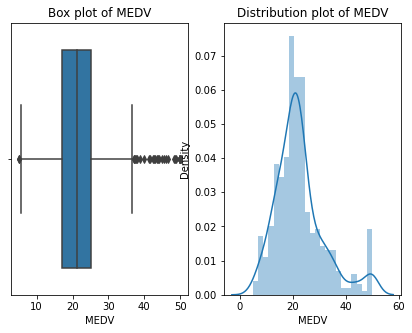

In [18]:
# Analysis of Column MEDV - Median value of owner-occupied homes in $10000's

analysis_column(boston_data.MEDV)

count of outlier  39
Mean  22.528853754940737
Median  21.2
Missing values 0
% of Missing values 0.0


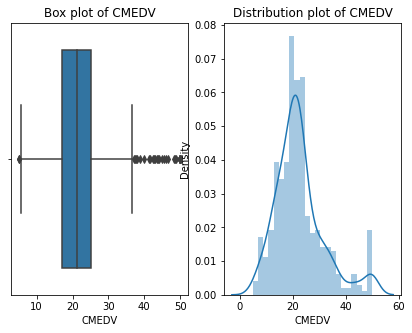

In [19]:
# Analysis of Column CMEDV - Median value of owner-occupied homes in $10000's

analysis_column(boston_data.CMEDV)

count of outlier  66
Mean  3.6135235573122535
Median  0.25651
Missing values 0
% of Missing values 0.0


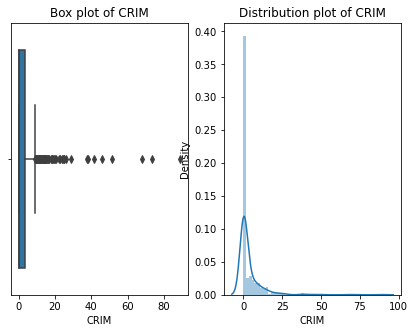

In [20]:
# Analysis of Column CRIM

analysis_column(boston_data.CRIM)

count of outlier  68
Mean  11.363636363636363
Median  0.0
Missing values 0
% of Missing values 0.0


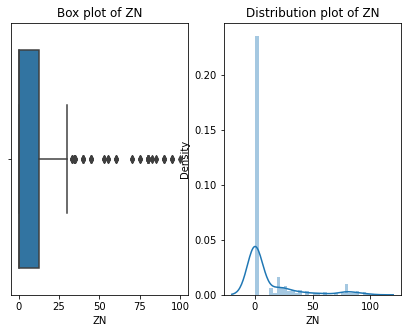

In [21]:
# Analysis of Column ZN

analysis_column(boston_data.ZN)

count of outlier  0
Mean  11.136778656126504
Median  9.69
Missing values 0
% of Missing values 0.0


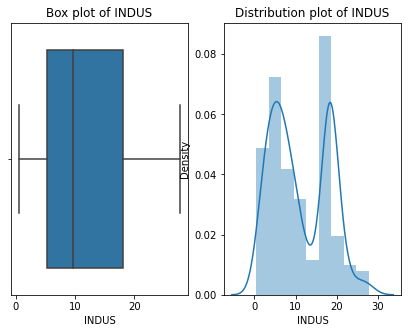

In [22]:
# Analysis of Column INDUS

analysis_column(boston_data.INDUS)

count of outlier  35
Mean  0.0691699604743083
Median  0.0
Missing values 0
% of Missing values 0.0


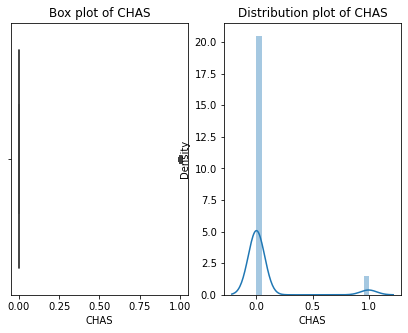

In [23]:
# Analysis of Column CHAS

analysis_column(boston_data.CHAS)

count of outlier  0
Mean  0.5546950592885372
Median  0.538
Missing values 0
% of Missing values 0.0


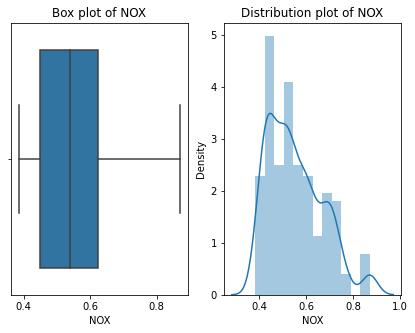

In [24]:
# Analysis of Column NOX

analysis_column(boston_data.NOX)

count of outlier  30
Mean  6.284634387351787
Median  6.2085
Missing values 0
% of Missing values 0.0


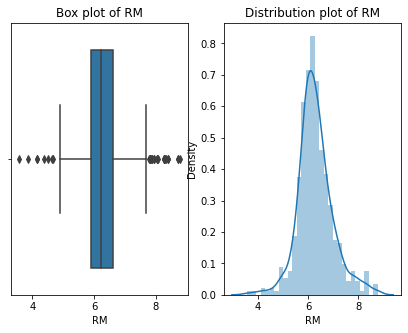

In [25]:
# Analysis of Column RM

analysis_column(boston_data.RM)

count of outlier  0
Mean  68.57490118577078
Median  77.5
Missing values 0
% of Missing values 0.0


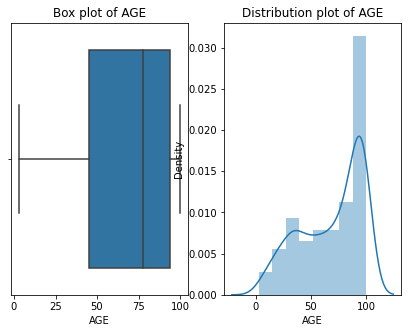

In [26]:
# Analysis of Column AGE
analysis_column(boston_data.AGE)

count of outlier  5
Mean  3.795042687747034
Median  3.2074499999999997
Missing values 0
% of Missing values 0.0


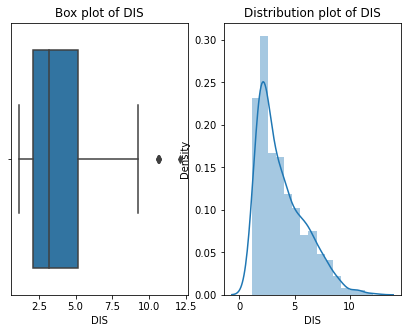

In [27]:
# Analysis of Column DIS
analysis_column(boston_data.DIS)

count of outlier  0
Mean  9.549407114624506
Median  5.0
Missing values 0
% of Missing values 0.0


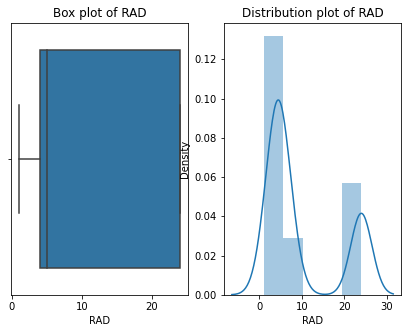

In [28]:
# Analysis of Column RAD
analysis_column(boston_data.RAD)

count of outlier  0
Mean  408.2371541501976
Median  330.0
Missing values 0
% of Missing values 0.0


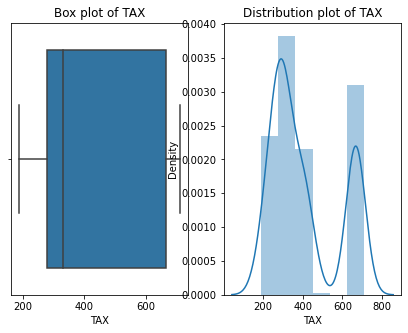

In [29]:
# Analysis of Column TAX
analysis_column(boston_data.TAX)

count of outlier  15
Mean  18.455533596837967
Median  19.05
Missing values 0
% of Missing values 0.0


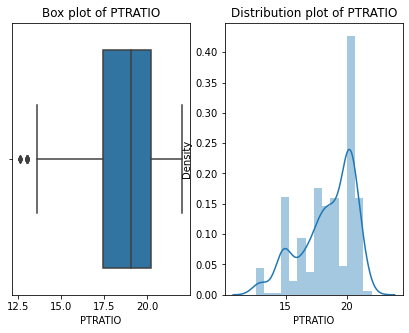

In [30]:
# Analysis of Column PTRATIO
analysis_column(boston_data.PTRATIO)

count of outlier  77
Mean  356.67403162055257
Median  391.44
Missing values 0
% of Missing values 0.0


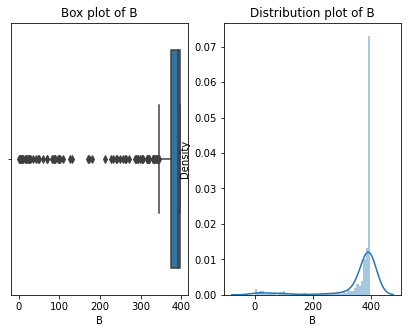

In [31]:
# Analysis of Column B

analysis_column(boston_data.B)

count of outlier  7
Mean  12.653063241106723
Median  11.36
Missing values 0
% of Missing values 0.0


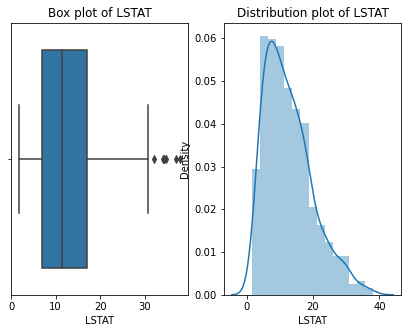

In [32]:
# Analysis of Column LSTAT

analysis_column(boston_data.LSTAT)

In [15]:
#Drop Columns we do not want to anaylsis below (non-numerical data fields)



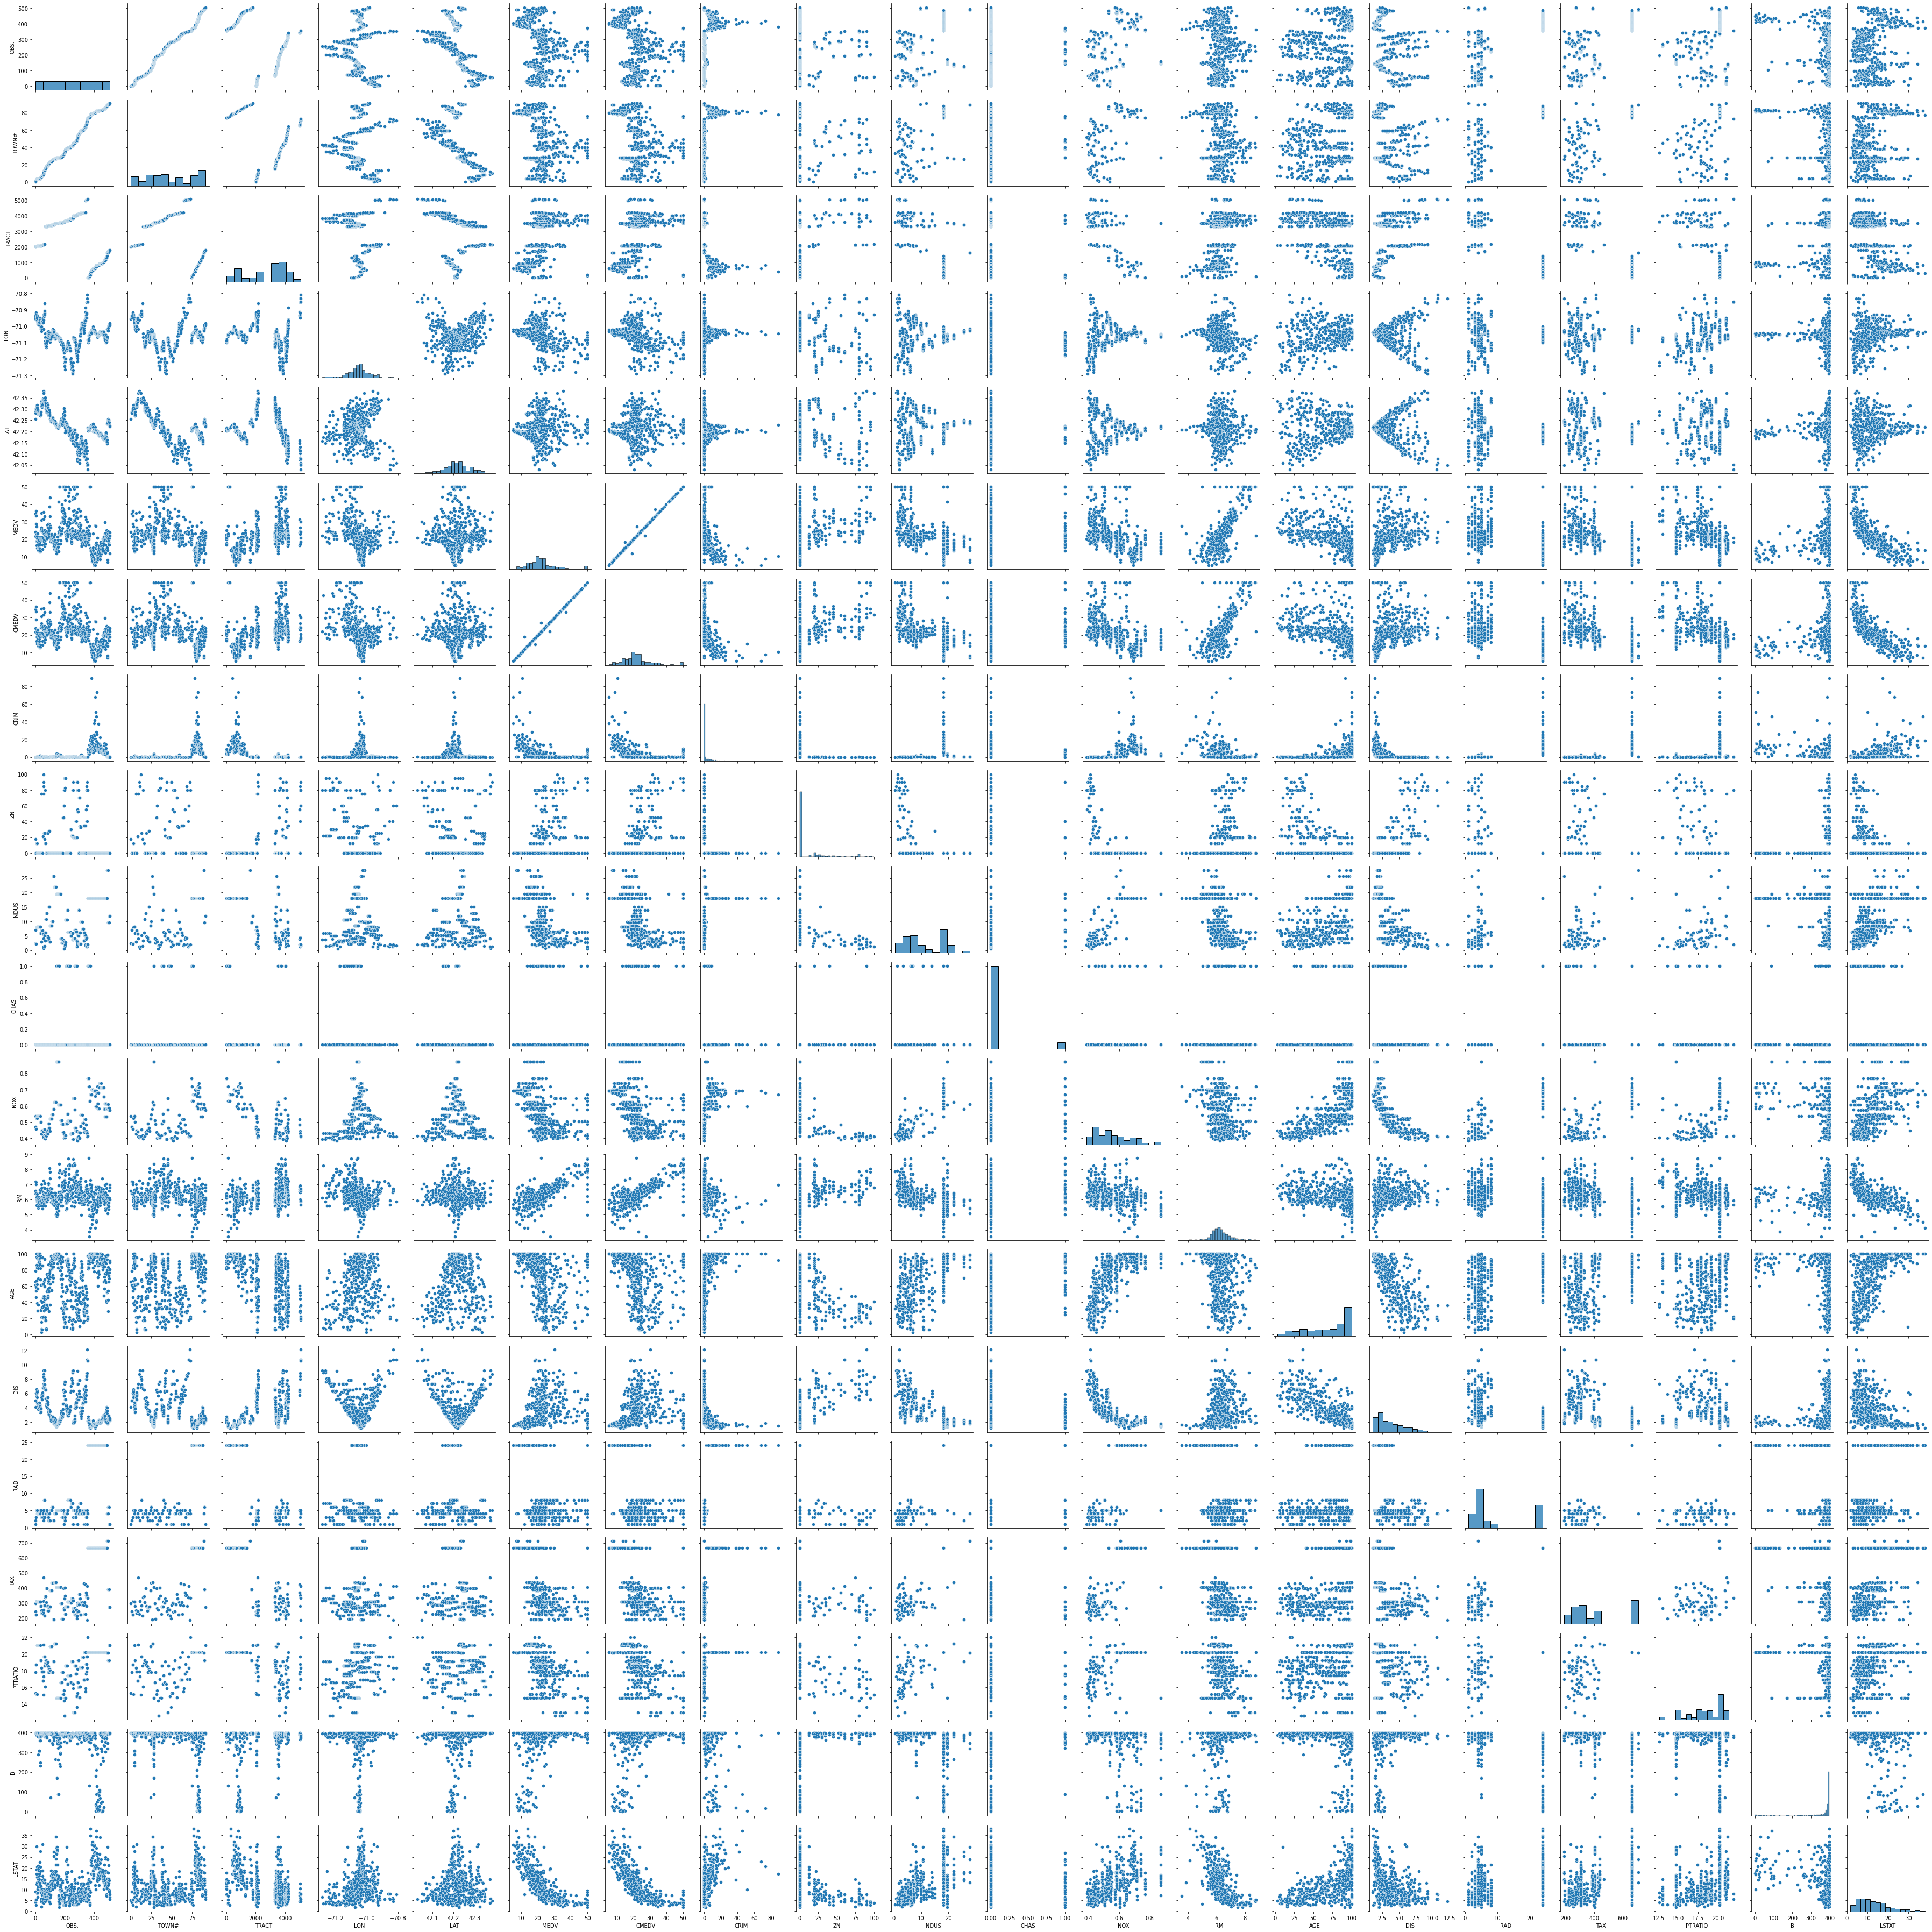

In [16]:
# Calculate and show pairplot of data, looking for visual cues for correlations

%matplotlib inline 

sn.pairplot(boston_data, size=2.5)
plt.tight_layout()

Method of correlation:

pearson : standard correlation coefficient

spearman : Spearman rank correlation

<AxesSubplot:>

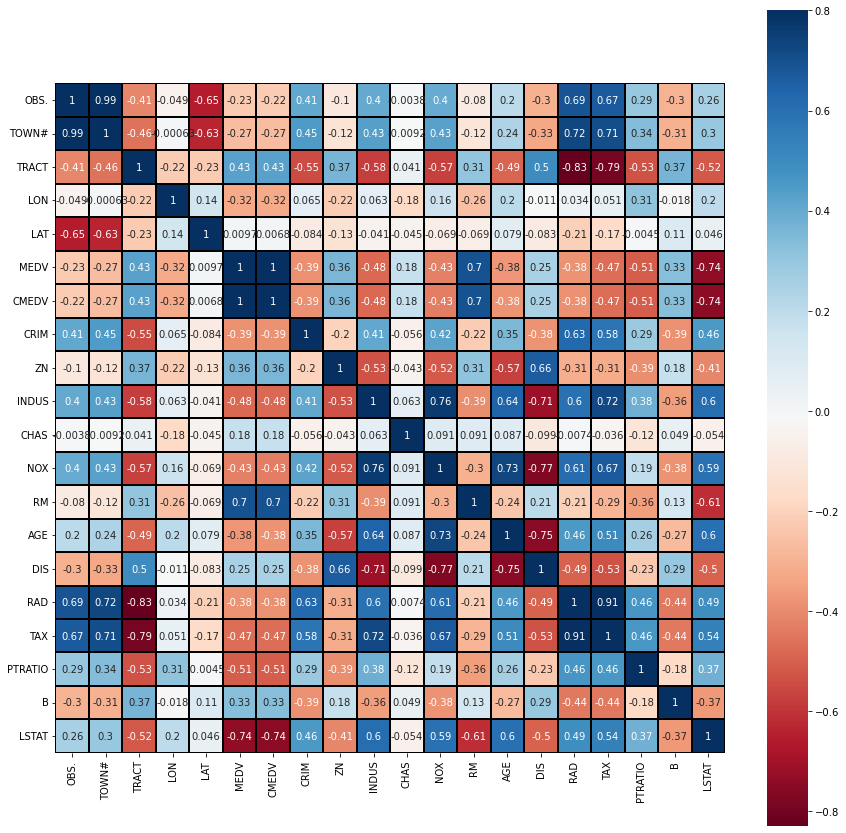

In [17]:
#Heatmap for Pearson standard correlation coefficient

corr=boston_data.corr(method='pearson')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

#### Positive Standard Correlation >= .7
------------------------------------
* MEDV:RM [.7]        | Median value of owner-occupied homes [increases] as average number of rooms per dwelling [increases]
* INDUS:NOX [.76]     | nitric oxides concentration [increases] as proportion of non-retail business acres per town [increases]
* INDUS:TAX [.72]     | Full-value property-tax rate [increases] as proportion of non-retail business acres per town [increases]
*  NOX:AGE [.73]       | nitric oxides concentration [increases] as proportion of owner-occupied units built prior to 1940 [increases]
*  RAD:TAX [.91]       | ull-value property-tax rate [increases] as index of accessibility to radial highways [increases]

#### Negative Standard Correlation <= -.7
------------------------------------
*  MEDV:LSTAT [-.74]   | As the % lower status of the population [increases] the median values of owner-occupied homes [decreases]
*  INDUS:DIS [-.71]    | weighted distances to five Boston employment centres [increases] then the lower proportion of non-retail business acres per town [decreases]
*  TAX:TRACT [-.79]    | 
*  NOX:DIS [-.77]      | weighted distances to five Boston employment centres [increases] then nitric oxides concentration [decreases]
*  DIS:AGE [.-75]      | weighted distances to five Boston employment centres [increases] then proportion of owner-occupied units built prior to 1940 [decreases]
*  RAD:TRACT [-.83]    | 


<AxesSubplot:>

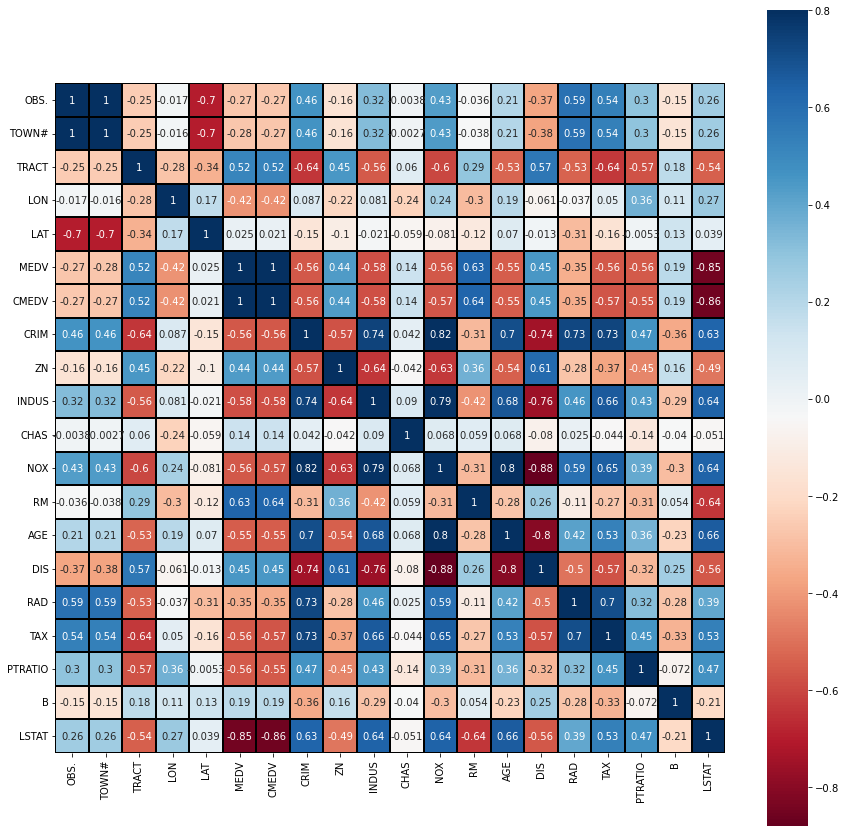

In [18]:
#Heatmap for Spearman rank correlation 

corr=boston_data.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

#### Rank Correlation >= .7
------------------------------------

* CRIM:INDUS [.74]
* CRIM:NOX [.82]
* CRIM:AGE [.7]
* CRIM:RAD [.73]
* CRIM:TAX [.73]
* INDUS:NOX [.79]
* NOX:AGE [.8]
* RAD:TAX [.7]

#### Rank Correlation <= -.7
------------------------------------
* MEDV:LSTAT [-.85]
* CRIM:DIS [-.74]
* INDUS:DIS [-.76]
* NOX:DIS [-.88]
* DIS:AGE [.-8]


In [20]:
#Creating new DF to hold just features that had a +/-0.70 result from either the Pearson or Spearman correlation functions

#MEDV, RM, INDUS, NOX, TAX, AGE, RAD, LSTAT, DIS, TRACT, CRIM

boston_features_df =  boston_data.drop(['OBS.', 'TOWN', 'TOWN#', 'LON', 'LAT', 'ZN', 'CHAS','PTRATIO', 'B'], axis=1)

boston_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TRACT   506 non-null    int64  
 1   MEDV    506 non-null    float64
 2   CMEDV   506 non-null    float64
 3   CRIM    506 non-null    float64
 4   INDUS   506 non-null    float64
 5   NOX     506 non-null    float64
 6   RM      506 non-null    float64
 7   AGE     506 non-null    float64
 8   DIS     506 non-null    float64
 9   RAD     506 non-null    int64  
 10  TAX     506 non-null    int64  
 11  LSTAT   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


<AxesSubplot:>

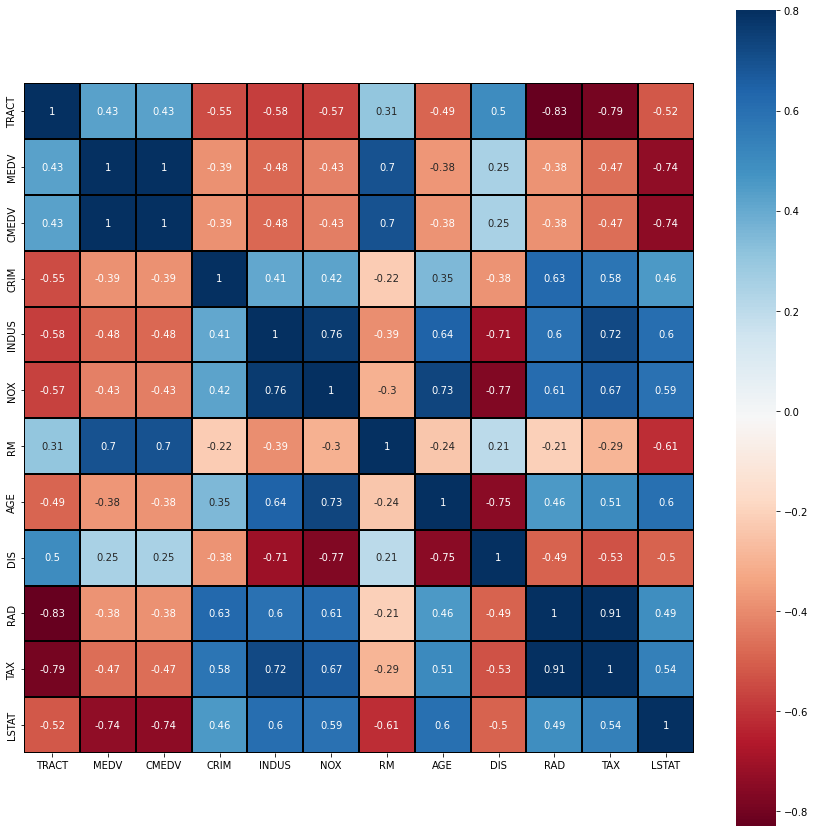

In [21]:
#Run Pearson heatmap again on just the features

corr=boston_features_df.corr(method='pearson')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

<AxesSubplot:>

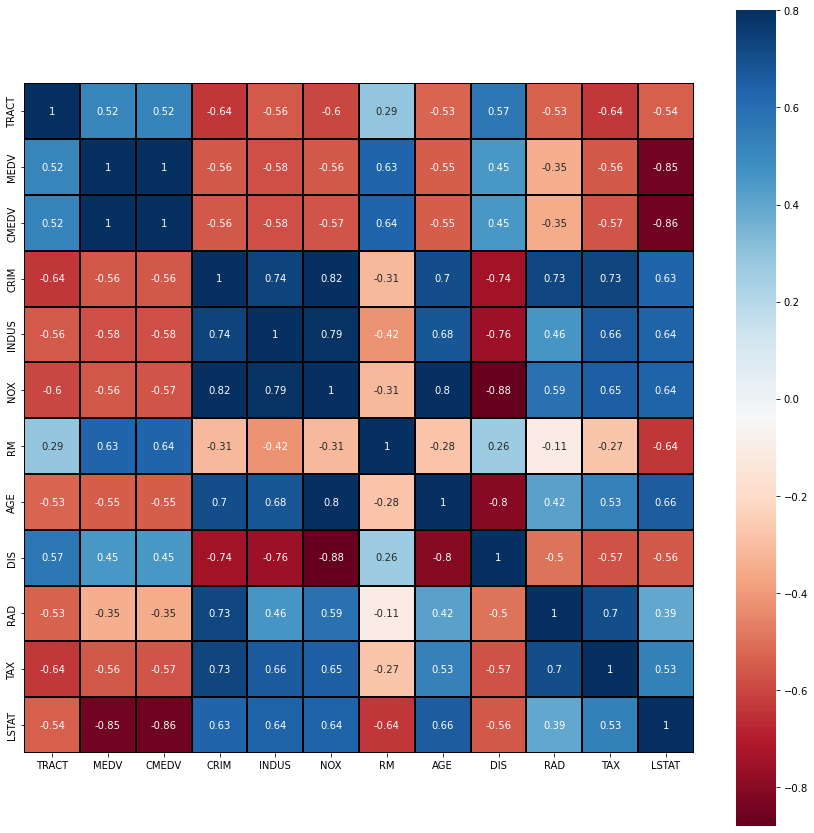

In [22]:
#Run the Spearman heatmap again on just the features

corr=boston_features_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

<AxesSubplot:xlabel='MEDV', ylabel='RM'>

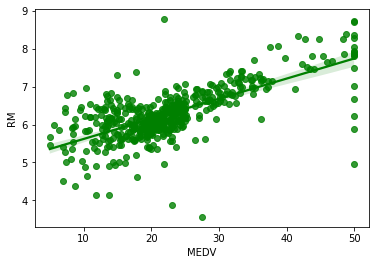

In [23]:
#Run regression plots between independent variables and the target
#
#MEDV:RM [.7] STD

sn.regplot(x=boston_data.MEDV, y=boston_data.RM, color='g')

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

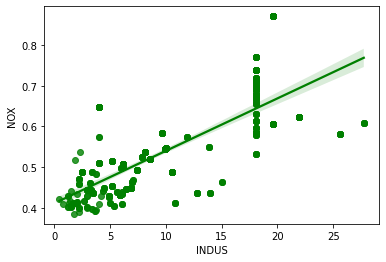

In [24]:
#Run regression plots between independent variables and the target
#
#INDUS:NOX [.76] STD

sn.regplot(x=boston_data.INDUS, y=boston_data.NOX, color='g')

<AxesSubplot:xlabel='INDUS', ylabel='TAX'>

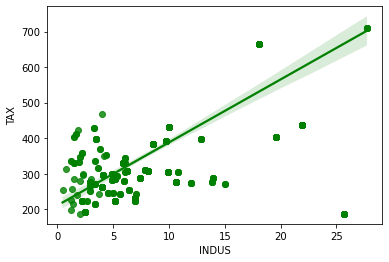

In [25]:
#Run regression plots between independent variables and the target
#
#INDUS:TAX [.72] STD

sn.regplot(x=boston_data.INDUS, y=boston_data.TAX, color='g')

<AxesSubplot:xlabel='NOX', ylabel='AGE'>

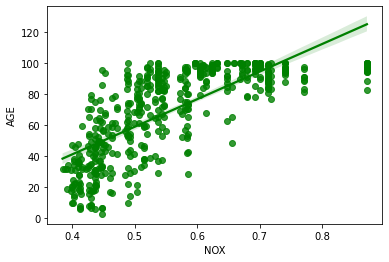

In [26]:
#Run regression plots between independent variables and the target
#
#NOX:AGE [.73] STD

sn.regplot(x=boston_data.NOX, y=boston_data.AGE, color='g')

<AxesSubplot:xlabel='RAD', ylabel='TAX'>

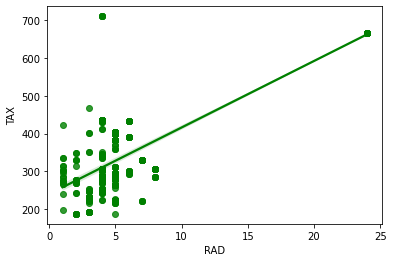

In [27]:
#Run regression plots between independent variables and the target
#
#RAD:TAX [.91] STD

sn.regplot(x=boston_data.RAD, y=boston_data.TAX, color='g')

<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

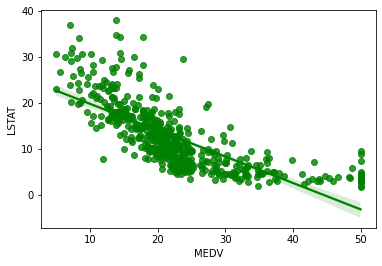

In [28]:
#Run regression plots between independent variables and the target
#
#MEDV:LSTAT [-.74] STD

sn.regplot(x=boston_data.MEDV, y=boston_data.LSTAT, color='g')

<AxesSubplot:xlabel='INDUS', ylabel='DIS'>

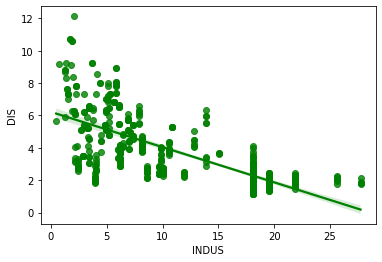

In [29]:
#Run regression plots between independent variables and the target
#
#INDUS:DIS [-.71] STD

sn.regplot(x=boston_data.INDUS, y=boston_data.DIS, color='g')

<AxesSubplot:xlabel='TAX', ylabel='TRACT'>

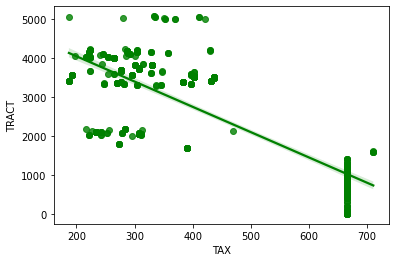

In [30]:
#Run regression plots between independent variables and the target
#
#TAX:TRACT [-.79] STD

sn.regplot(x=boston_data.TAX, y=boston_data.TRACT, color='g')

<AxesSubplot:xlabel='NOX', ylabel='DIS'>

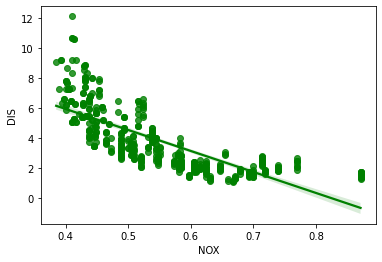

In [31]:
#Run regression plots between independent variables and the target
#
#NOX:DIS [-.77] STD

sn.regplot(x=boston_data.NOX, y=boston_data.DIS, color='g')

<AxesSubplot:xlabel='AGE', ylabel='DIS'>

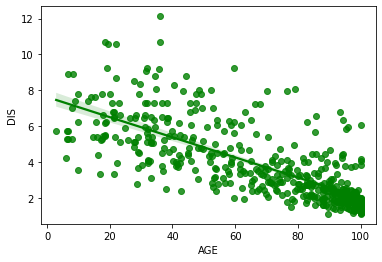

In [32]:
#Run regression plots between independent variables and the target
#
#DIS:AGE [.-75] STD

sn.regplot(x=boston_data.AGE, y=boston_data.DIS, color='g')

<AxesSubplot:xlabel='RAD', ylabel='TRACT'>

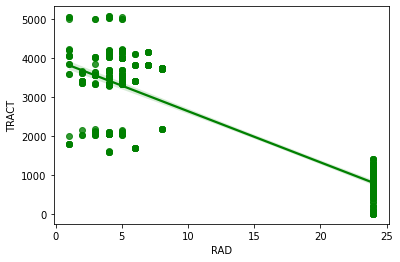

In [33]:
#Run regression plots between independent variables and the target
#
#RAD:TRACT [-.83] STD

sn.regplot(x=boston_data.RAD, y=boston_data.TRACT, color='g')